In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import os
import joblib

In [10]:
df =  pd.read_csv('dataset_completo_con_ratios.csv')
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38916 entries, 0 to 38915
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                38916 non-null  object 
 1   trending_date           38916 non-null  object 
 2   title                   38916 non-null  object 
 3   channel_title           38916 non-null  object 
 4   category_id             38916 non-null  int64  
 5   publish_time            38916 non-null  object 
 6   tags                    38916 non-null  object 
 7   views                   38916 non-null  float64
 8   likes                   38916 non-null  float64
 9   dislikes                38916 non-null  float64
 10  comment_count           38916 non-null  float64
 11  thumbnail_link          38916 non-null  object 
 12  comments_disabled       38916 non-null  bool   
 13  ratings_disabled        38916 non-null  bool   
 14  video_error_or_removed  38916 non-null

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,lat,lon,geometry,category_title,like_ratio,total_interactions,trending_clasify,views_per_comment,dislikes_adj,like_dislike_ratio
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515.000,55681.000,8093.75,...,50.700405,-3.529950,POINT (-3.529950197 50.70040529),Howto & Style,0.873088,73253.750,Base,762.160038,8093.75,6.879506
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632.000,25561.000,2294.00,...,53.500415,-2.247987,POINT (-2.247987103 53.50041526),Entertainment,0.917645,30612.000,Base,382.166123,2294.00,11.142546
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",8831780.375,276377.625,8093.75,...,51.383749,-2.350022,POINT (-2.350022218 51.3837486),Music,0.971548,306556.625,Alta,399.894969,8093.75,34.147042
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833.000,193.000,12.00,...,57.170398,-2.079987,POINT (-2.079987021 57.17039797),Sports,0.941463,242.000,Base,752.243243,12.00,16.083333
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815.000,30.000,2.00,...,50.900031,-1.399977,POINT (-1.399976849 50.90003135),News & Politics,0.937500,62.000,Base,327.166667,2.00,15.000000


In [13]:
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['publish_hour'] = df['publish_time'].dt.hour
df['publish_day'] = df['publish_time'].dt.dayofweek  # 0 = lunes, 6 = domingo
df['publish_month'] = df['publish_time'].dt.month
df['publish_weekday'] = df['publish_time'].dt.day_name()
label_encoder = LabelEncoder()
df['trending_clasify'] = label_encoder.fit_transform(df['trending_clasify'])
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,like_ratio,total_interactions,trending_clasify,views_per_comment,dislikes_adj,like_dislike_ratio,publish_hour,publish_day,publish_month,publish_weekday
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10 07:38:29+00:00,"christmas|""john lewis christmas""|""john lewis""|...",7224515.000,55681.000,8093.75,...,0.873088,73253.750,1,762.160038,8093.75,6.879506,7,4,11,Friday
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12 06:24:44+00:00,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632.000,25561.000,2294.00,...,0.917645,30612.000,1,382.166123,2294.00,11.142546,6,6,11,Sunday
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",8831780.375,276377.625,8093.75,...,0.971548,306556.625,0,399.894969,8093.75,34.147042,17,4,11,Friday
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13 02:30:38+00:00,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833.000,193.000,12.00,...,0.941463,242.000,1,752.243243,12.00,16.083333,2,0,11,Monday
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13 01:45:13+00:00,[none],9815.000,30.000,2.00,...,0.937500,62.000,1,327.166667,2.00,15.000000,1,0,11,Monday


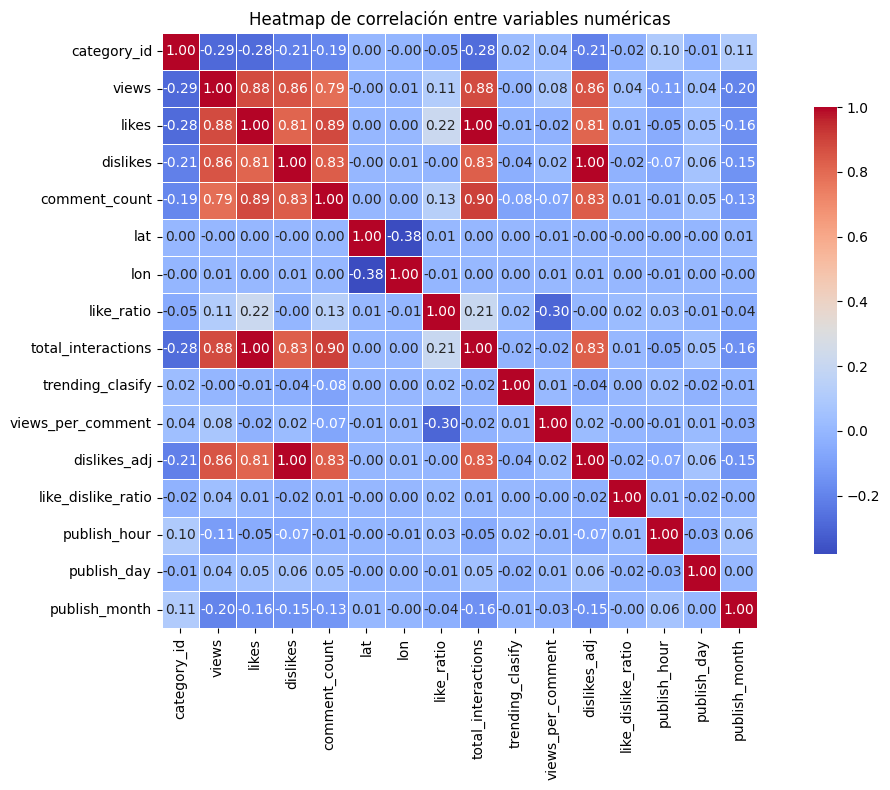

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo columnas numéricas (correlación solo aplica a valores numéricos)
numericas = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlation_matrix = numericas.corr()

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True,
            linewidths=0.5, cbar_kws={"shrink": .75})

plt.title('Heatmap de correlación entre variables numéricas')
plt.tight_layout()
plt.show()

In [54]:
X = df[['views', 'likes','dislikes']]
y = df['trending_clasify']

In [55]:
y
#X

0        1
1        1
2        0
3        1
4        1
        ..
38911    2
38912    1
38913    0
38914    2
38915    1
Name: trending_clasify, Length: 38916, dtype: int32

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)#distribucion de rango 80-20

In [57]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
#y_pred = rf.predict(X_test)

In [58]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf.score(X_test, y_test)

0.9846680942184154

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       968
           1       1.00      1.00      1.00      9285
           2       0.97      0.90      0.93      1422

    accuracy                           0.98     11675
   macro avg       0.95      0.95      0.95     11675
weighted avg       0.99      0.98      0.98     11675



In [60]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 933    0   35]
 [   0 9281    4]
 [ 128   12 1282]]


In [61]:
features =  pd.DataFrame(rf.feature_importances_, index = X.columns)
features.head()

,0
views,0.379977
likes,0.423350
dislikes,0.196673


In [62]:
#hyperparameters
rf2 = RandomForestClassifier(n_estimators= 1000, criterion= 'entropy', min_samples_split= 10, max_depth=14, random_state=17)

In [63]:
rf2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=14, min_samples_split=10,
                       n_estimators=1000, random_state=17)

In [64]:
rf2.score(X_test, y_test)

0.9859528907922912

In [65]:
y_pred2 = rf2.predict(X_test)

In [66]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       968
           1       1.00      1.00      1.00      9285
           2       0.98      0.91      0.94      1422

    accuracy                           0.99     11675
   macro avg       0.95      0.96      0.96     11675
weighted avg       0.99      0.99      0.99     11675



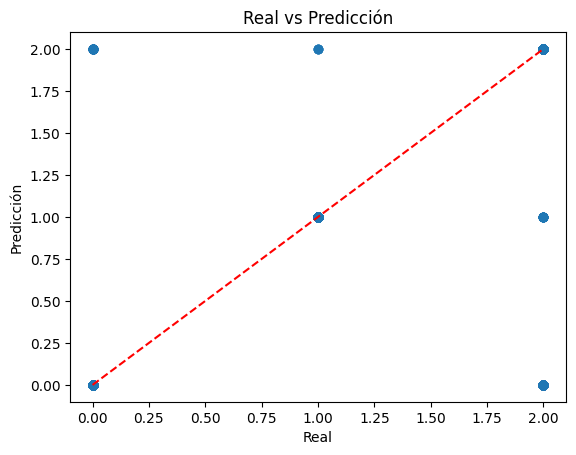

In [67]:
plt.scatter(y_test, y_pred)
plt.xlabel("Real")
plt.ylabel("Predicción")
plt.title("Real vs Predicción")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()